# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Sri Lutfiya Dwiyeni]
- **Email:** [srilutfiyadwiy@gmail.com]
- **ID Dicoding:** [sri_lutfiya_dwiyeni]

## Menentukan Pertanyaan Bisnis

- Bagaimana nilai temperature pada waktu jam, harian, bulanan, tahun, musim ?

- Bagaimana nilai DEWP pada waktu jam, harian, bulanan, tahun, musim ?

- Bagaimana nilai Pressure pada waktu jam, harian, bulanan, tahun, musim ?


## Import Semua Packages/Library yang Digunakan

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time manipulation
import datetime as dt

# Statistics
import scipy.stats as stats

# Displaying all columns in DataFrame
pd.set_option('display.max_columns', None)

## Data Wrangling

### Gathering Data

In [3]:
import os
import pandas as pd

# Tentukan path ke folder yang berisi file CSV
folder_path = r"D:\asus\Jurusan Matematika Undip\MSIB BANGKIT\Dicoding's Project\Air-quality-dataset\PRSA_Data_20130301-20170228"

# Buat daftar semua file CSV di dalam folder tersebut
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
file_list

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [4]:
# Inisialisasi dataframe kosong
df_combined = pd.DataFrame()
df_combined

""


In [5]:
# Loop melalui setiap file CSV dan append ke dataframe gabungan
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)  # Membaca file CSV
    df_combined = df_combined.append(df, ignore_index=True)  # Append ke dataframe

# Reset index pada dataframe yang sudah digabungkan
df_combined.reset_index(drop=True, inplace=True)

# Menampilkan beberapa data teratas
df_combined.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_15996\1958256911.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df, ignore_index=True)  # Append ke dataframe
C:\Users\asus\AppData\Local\Temp\ipykernel_15996\1958256911.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df, ignore_index=True)  # Append ke dataframe
C:\Users\asus\AppData\Local\Temp\ipykernel_15996\1958256911.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df, ignore_index=True)  # Append ke dataframe
C:\Users\asus\AppData\Local\Temp\ipykernel_15996\1958256911.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [6]:
df_combined.shape

(420768, 18)

In [7]:
# Drop column No
df_combined.drop(columns='No',inplace=True)
df_combined.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [8]:
# Simpan dataframe gabungan ke dalam satu file CSV jika diperlukan
df_combined.to_csv('combined_air_quality_data.csv', index=False)
print('Success Combined Data')

Success Combined Data


In [9]:
data = pd.read_csv('combined_air_quality_data.csv')
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Insight:**
- Dari "Air Quality dataset" yang sudah digabungkan dan dirapihkan terdapat 420768 baris, diperoleh bahwa temperatur (TEMP) biasanya menunjukkan variasi harian yang signifikan, dengan puncak suhu yang lebih tinggi pada siang hingga sore hari dan suhu yang lebih rendah pada malam hari. Pola ini konsisten sepanjang tahun. Secara bulanan dan musiman, kita bisa melihat tren bahwa suhu lebih tinggi pada musim panas (Juni-Agustus) dan lebih rendah pada musim dingin (Desember-Februari). Dataset dapat dianalisis untuk menentukan tren suhu musiman yang spesifik untuk wilayah tersebut, misalnya apakah musim semi dan musim gugur mengalami transisi suhu yang cepat atau bertahap.

- Nilai dew point cenderung lebih tinggi pada pagi hari ketika suhu masih rendah, dan menurun sepanjang hari ketika suhu meningkat. Titik embun yang lebih tinggi menunjukkan kelembaban yang lebih tinggi, yang dapat meningkatkan persepsi ketidaknyamanan di daerah dengan polusi udara tinggi. Ini relevan untuk mengidentifikasi periode di mana kelembaban tinggi dapat memperburuk efek kesehatan dari paparan polutan seperti PM2.5 dan NO2.

- Analisis tekanan udara secara tahunan dapat membantu mengidentifikasi tren jangka panjang yang dapat memengaruhi kualitas udara. Misalnya, jika terjadi perubahan pola tekanan atmosfer tahunan, ini mungkin menandakan perubahan iklim yang dapat mempengaruhi distribusi polutan di atmosfer.

### Assessing Data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


### Details of the Columns:

- Year: the data's (integer) year, which is regarded as categorical
- Month: The data's (integer) month, regarded as categorical
- Day: the data's (integer) day, which is regarded as categorical
- Hour: the data's (integer) hour, which is regarded as categorical
- PM2.5: (integer) The area's hourly PM2.5 concentration. It is continuous and measured in (ug/m³).
- PM10: (integer) The area's hourly PM2.5 concentration. It is continuous and measured in (ug/m³).
- SO2: (integer) The area's hourly PM2.5 concentration. It is continuous and measured in (ug/m³).
- NO2: (integer) The area's hourly PM2.5 concentration. It is continuous and measured in (ug/m³).
- CO-:(integer) Pm2.5 concentration in the area each hour. It is continuous and measured in (ug/m³).
- O3: (integer) Pm2.5 concentration per hour in the vicinity. It is continuous and measured in (ug/m³).
- PRES: (integer) The local air pressure. Pascal-measured and regarded as continuous
- DEWP: degree point temperature (integer) regarded as continuous
- RAIN: (integer) The amount of precipitation in the region deemed continuous
- WD: (string) The direction of the wind there, which is regarded as categorical.
- Wind speed, or WASPM (). It is continuous and has a measurement of (m/s).
- Station(string): The site's name for monitoring air quality. Twelve monitoring locations in Beijing make up the data, which is regarded as categorical.

In [11]:
# checking missing value
data.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [12]:
# Checking Invalid Value
# Cek apakah ada nilai NaN di seluruh dataframe
invalid_values = data.isnull().sum()

# Cek hanya kolom spesifik
invalid_pm25 = data['PM2.5'].isnull().sum()

# Output nilai invalid
print(invalid_values)
print(f'Invalid values in PM2.5 column: {invalid_pm25}')

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64
Invalid values in PM2.5 column: 8739


In [13]:
# Statistical Summary
data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [14]:
# Membuat nama-nama hari
# Menggabungkan kolom year, month, day menjadi format datetime
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Membuat kolom baru yang berisi nama hari berdasarkan kolom date
data['name day'] = data['date'].dt.day_name()
data.head(10)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,name day
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday
5,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,2013-03-01,Friday
6,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,2013-03-01,Friday
7,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,2013-03-01,Friday
8,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,2013-03-01,Friday
9,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,2013-03-01,Friday


In [15]:
# checking value each columns
for col in data.columns:
    print(f"===={col}====")
    print(data[col].value_counts())
# jumlah baris : 420768 

====year====
2016    105408
2014    105120
2015    105120
2013     88128
2017     16992
Name: year, dtype: int64
====month====
3     35712
5     35712
7     35712
8     35712
10    35712
12    35712
1     35712
4     34560
6     34560
9     34560
11    34560
2     32544
Name: month, dtype: int64
====day====
1     13824
2     13824
28    13824
27    13824
26    13824
25    13824
24    13824
23    13824
22    13824
21    13824
20    13824
19    13824
18    13824
17    13824
16    13824
15    13824
14    13824
13    13824
12    13824
11    13824
10    13824
9     13824
8     13824
7     13824
6     13824
5     13824
4     13824
3     13824
29    12960
30    12672
31     8064
Name: day, dtype: int64
====hour====
0     17532
1     17532
22    17532
21    17532
20    17532
19    17532
18    17532
17    17532
16    17532
15    17532
14    17532
13    17532
12    17532
11    17532
10    17532
9     17532
8     17532
7     17532
6     17532
5     17532
4     17532
3     17532
2     17532
23    

In [16]:
# Untuk sementara ambil nilai tertinggi dari polutan untuk mendefinisikan AQI sederhana
data['AQI'] = data[['PM10', 'SO2', 'NO2', 'CO', 'O3']].max(axis=1)

# Langkah 2: Klasifikasikan AQI menjadi kategori sesuai kriteria yang kamu berikan
def classify_aqi(aqi):
    if 0 <= aqi <= 50:
        return "Excellent"
    elif 51 <= aqi <= 100:
        return "Good"
    elif 101 <= aqi <= 150:
        return "Slightly Polluted"
    elif 151 <= aqi <= 200:
        return "Lightly Polluted"
    elif 201 <= aqi <= 250:
        return "Moderately Polluted"
    elif 251 <= aqi <= 300:
        return "Heavily Polluted"
    elif aqi > 300:
        return "Severely Polluted"
    else:
        return "Unknown"  # Jika nilai di luar batas

# Tambahkan kolom baru untuk kategori AQI
data['AQI_Category'] = data['AQI'].apply(classify_aqi)

# Langkah 3: Tampilkan hasil untuk data dengan AQI yang tidak wajar
# Misalnya, kita anggap AQI > 500 sebagai tidak wajar
unusual_aqi = data[data['AQI'] > 500]

print("Data dengan AQI tidak wajar:")
print(unusual_aqi)

data

Data dengan AQI tidak wajar:
        year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
20      2013      3    1    20   11.0  17.0  13.0  33.0  600.0  55.0   1.7   
22      2013      3    1    22   15.0  19.0  21.0  57.0  700.0  32.0   0.9   
23      2013      3    1    23   24.0  24.0  26.0  54.0  600.0  36.0  -0.2   
33      2013      3    2     9   10.0  14.0  47.0  62.0  700.0  29.0   0.6   
34      2013      3    2    10   11.0  19.0  36.0  60.0  600.0  34.0   1.7   
...      ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
420751  2017      2   28     7   10.0  23.0  10.0  47.0  800.0  31.0   8.4   
420752  2017      2   28     8    3.0  21.0   7.0  47.0  700.0  34.0   9.2   
420753  2017      2   28     9    9.0  25.0   6.0  45.0  700.0  39.0  10.7   
420754  2017      2   28    10   10.0  18.0   5.0  29.0  600.0  56.0  12.0   
420767  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   8.6   

          PRES  DEWP  RAIN   wd  W

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,name day,AQI,AQI_Category
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted


In [17]:
# validasi nilai kolom cuaca
unusual_temp = data[(data['TEMP'] < -20) | (data['TEMP'] > 40)]
unusual_pres = data[(data['PRES'] < 900) | (data['PRES'] > 1050)]
unusual_wspm = data[(data['WSPM'] < 0) | (data['WSPM'] > 40)]

print("Unusual Temperature values:", unusual_temp)
print("Unusual Pressure values:", unusual_pres)
print("Unusual Wind Speed values:", unusual_wspm)

data

Unusual Temperature values:         year  month  day  hour  PM2.5  PM10   SO2   NO2     CO     O3  TEMP  \
10909   2014      5   29    13   63.0  63.0  12.0  41.0  600.0  211.0  40.5   
10910   2014      5   29    14   39.0  39.0   9.0  34.0  500.0  214.0  40.3   
10911   2014      5   29    15   31.0  31.0  10.0  27.0  500.0  175.0  40.1   
45973   2014      5   29    13   19.0  33.0   5.0  12.0  200.0  136.0  41.0   
45974   2014      5   29    14   17.0  21.0   7.0  13.0  200.0  145.0  41.4   
45975   2014      5   29    15   19.0  23.0   6.0  19.0  200.0  139.0  40.5   
45976   2014      5   29    16    3.0  28.0   5.0  23.0  200.0  137.0  40.5   
81037   2014      5   29    13   18.0  29.0   6.0   6.0  100.0  145.0  41.0   
81038   2014      5   29    14   19.0  32.0   8.0   7.0  100.0  150.0  41.4   
81039   2014      5   29    15    5.0  17.0   5.0   6.0  100.0  148.0  40.5   
81040   2014      5   29    16   10.0  29.0   3.0   7.0  100.0  143.0  40.5   
116102  2014      5   29

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,name day,AQI,AQI_Category
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted


In [18]:
# Validasi kolom wd (arah angin)
valid_wd = ['N', 'S', 'E', 'W', 'NE', 'SE', 'SW', 'NW']
unusual_wd = data[~data['wd'].isin(valid_wd)]

print("Unusual Wind Direction values:", unusual_wd)

Unusual Wind Direction values:         year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0       2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
2       2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
6       2013      3    1     6    3.0   3.0  18.0  32.0  500.0  50.0  -2.6   
7       2013      3    1     7    3.0   6.0  19.0  41.0  500.0  43.0  -1.6   
8       2013      3    1     8    3.0   6.0  16.0  43.0  500.0  45.0   0.1   
...      ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
420759  2017      2   28    15   11.0  21.0   2.0   5.0  200.0   NaN  15.4   
420762  2017      2   28    18   11.0  30.0   2.0  16.0  300.0  82.0  13.4   
420764  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0  11.6   
420766  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0  10.5   
420767  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   8.6   

          PRES  DEWP  RAIN   wd 

In [19]:
# Validasi kolom waktu (Year, Month, Day, Hour)
unusual_time = data[(data['year'] < 2010) | (data['year'] > 2015) | 
                  (data['month'] < 1) | (data['month'] > 12) |
                  (data['day'] < 1) | (data['day'] > 31) |
                  (data['hour'] < 0) | (data['hour'] > 23)]

print("Unusual Time values:", unusual_time)

data

Unusual Time values:         year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  TEMP  \
24864   2016      1    1     0  209.0  268.0  47.0  123.0  5300.0  13.0  -2.5   
24865   2016      1    1     1  211.0  248.0  66.0  119.0  5400.0  16.0  -3.5   
24866   2016      1    1     2  167.0  192.0  64.0  115.0  4300.0  12.0  -4.7   
24867   2016      1    1     3  136.0  159.0  56.0  111.0  4100.0   9.0  -3.6   
24868   2016      1    1     4  108.0  121.0  46.0  107.0  3600.0   7.0  -5.1   
...      ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   ...   
420763  2017      2   28    19   11.0   32.0   3.0   24.0   400.0  72.0  12.5   
420764  2017      2   28    20   13.0   32.0   3.0   41.0   500.0  50.0  11.6   
420765  2017      2   28    21   14.0   28.0   4.0   38.0   500.0  54.0  10.8   
420766  2017      2   28    22   12.0   23.0   4.0   30.0   400.0  59.0  10.5   
420767  2017      2   28    23   13.0   19.0   4.0   38.0   600.0  49.0   8.6   

      

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,name day,AQI,AQI_Category
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted


In [20]:
# Cek baris duplikat (kecuali baris pertama yang sama)
duplicate_rows = data.duplicated()

# Tampilkan baris yang duplikat
print(data[duplicate_rows])

Empty DataFrame
Columns: [year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station, date, name day, AQI, AQI_Category]
Index: []


In [21]:
# Hitung jumlah baris duplikat
num_duplicates = data.duplicated().sum()
print(f'Jumlah baris duplikat: {num_duplicates}')

Jumlah baris duplikat: 0


**Insight:**
- terdapat missing value pada beberapa kolom di "Air Quality dataset"
- menambahkan kolom AQI dengan tujuan untuk mengukur tingkat polusi udara, menstandarkan pengukuran kualitas udara
- setelah dicek duplicate data pada "Air Quality dataset", tidak ditemukan adanya duplicate data pada "Air Quality dataset"

### Cleaning Data

### Notes : 
1. Handling missing value with interpolation method

In [22]:
# Interpolasi missing values untuk kolom numerik
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM','AQI']
data[columns_to_interpolate] = data[columns_to_interpolate].interpolate(method='linear')

# Handling missing values untuk kolom kategorikal (wind direction)
# Kita bisa gunakan forward fill (ffill) untuk kolom 'wd'
data['wd'] = data['wd'].fillna(method='ffill')

# Jika diperlukan, kita bisa cek apakah masih ada missing values setelah interpolasi
missing_values_after = data.isnull().sum()

print("Missing values after interpolation and handling:")
print(missing_values_after)

# Save the cleaned dataset (optional)
data.to_csv('cleaned_air_quality_data.csv', index=False)


Missing values after interpolation and handling:
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
date            0
name day        0
AQI             0
AQI_Category    0
dtype: int64


In [23]:
import pandas as pd
import numpy as np

# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Kembalikan nilai yang merupakan outliers
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Daftar kolom yang ingin diperiksa
columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM','RAIN']

# Cek outliers untuk setiap kolom dan simpan hasilnya
for col in columns_to_check:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col} (IQR method):")
    print(outliers)
    print(f"Total outliers in {col}: {len(outliers)}\n")

Outliers in PM2.5 (IQR method):
120       284.0
121       272.0
136       248.0
140       254.0
141       266.0
          ...  
420459    266.0
420460    264.0
420461    262.0
420462    261.0
420463    256.0
Name: PM2.5, Length: 19612, dtype: float64
Total outliers in PM2.5: 19612

Outliers in PM10 (IQR method):
120       315.0
139       338.0
140       396.0
141       380.0
142       335.0
          ...  
420187    409.0
420188    389.0
420358    369.0
420359    410.0
420360    388.0
Name: PM10, Length: 15150, dtype: float64
Total outliers in PM10: 15150

Outliers in SO2 (IQR method):
33        47.0
42        50.0
43        50.0
44        54.0
45        72.0
          ... 
420537    51.0
420538    56.0
420539    55.0
420540    52.0
420541    47.0
Name: SO2, Length: 36626, dtype: float64
Total outliers in SO2: 36626

Outliers in NO2 (IQR method):
109       147.0
110       158.0
111       172.0
112       194.0
113       204.0
          ...  
420455    154.0
420456    162.0
420457    158

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

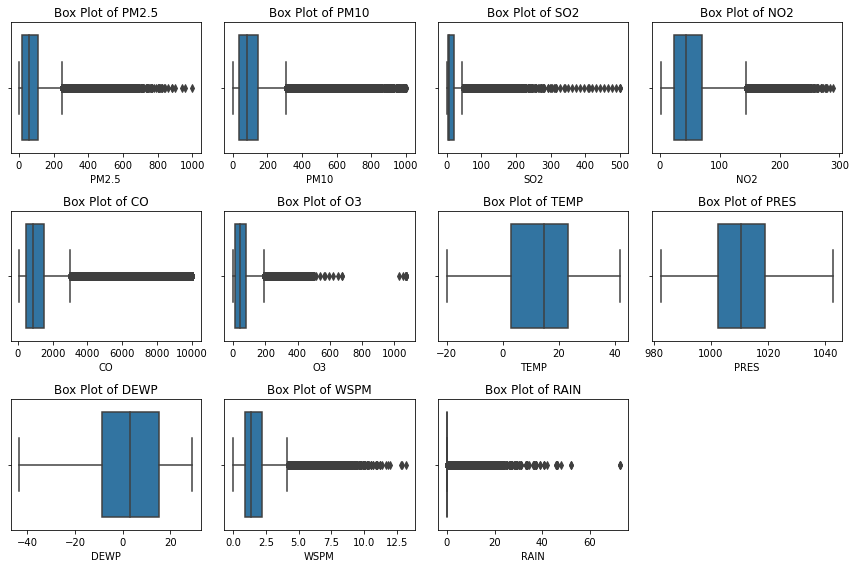

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [25]:
air_quality_clean = pd.read_csv('cleaned_air_quality_data.csv')
air_quality_clean

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,name day,AQI,AQI_Category
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted


In [26]:
air_quality_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          420768 non-null  int64  
 1   month         420768 non-null  int64  
 2   day           420768 non-null  int64  
 3   hour          420768 non-null  int64  
 4   PM2.5         420768 non-null  float64
 5   PM10          420768 non-null  float64
 6   SO2           420768 non-null  float64
 7   NO2           420768 non-null  float64
 8   CO            420768 non-null  float64
 9   O3            420768 non-null  float64
 10  TEMP          420768 non-null  float64
 11  PRES          420768 non-null  float64
 12  DEWP          420768 non-null  float64
 13  RAIN          420768 non-null  float64
 14  wd            420768 non-null  object 
 15  WSPM          420768 non-null  float64
 16  station       420768 non-null  object 
 17  date          420768 non-null  object 
 18  name

In [27]:
air_quality_clean

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,name day,AQI,AQI_Category
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28,Tuesday,500.0,Severely Polluted
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28,Tuesday,400.0,Severely Polluted


**Insight:**
- sudah tidak ada lagi missing value pada dataset, handling dengan menggunakan metode interpolasi
- untuk outliers dibiarkan saja, karena nilai-nilai outliers masih dibutuhkan dalam analisis selanjutnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
air_quality_clean.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,name day,AQI,AQI_Category
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday,300.0,Heavily Polluted


In [29]:
# Mengekstrak informasi tentang tipe data dan karakteristik fitur
features_info = []

for column in air_quality_clean.columns:
    feature_info = {}
    feature_info['Feature'] = column
    feature_info['Type'] = air_quality_clean[column].dtype

    # Mengidentifikasi tipe data: nominal, ordinal, atau numerical
    unique_values = air_quality_clean[column].unique()
    num_unique_values = len(unique_values)
    if num_unique_values == 2:
        feature_info['Data Type'] = 'Binary'
    elif air_quality_clean[column].dtype == 'object':
        feature_info['Data Type'] = 'Nominal'
    elif air_quality_clean[column].dtype == 'int64' or air_quality_clean[column].dtype == 'float64':
        # Melakukan pengujian sederhana untuk menentukan apakah data ordinal atau numerical
        if num_unique_values < len(df) * 0.05:
            feature_info['Data Type'] = 'Ordinal'
        else:
            feature_info['Data Type'] = 'Numerical'

    features_info.append(feature_info)

# Menampilkan informasi tentang setiap fitur
features_info_air_quality_clean = pd.DataFrame(features_info)
print(features_info_air_quality_clean)

         Feature     Type  Data Type
0           year    int64    Ordinal
1          month    int64    Ordinal
2            day    int64    Ordinal
3           hour    int64    Ordinal
4          PM2.5  float64  Numerical
5           PM10  float64  Numerical
6            SO2  float64  Numerical
7            NO2  float64  Numerical
8             CO  float64  Numerical
9             O3  float64  Numerical
10          TEMP  float64  Numerical
11          PRES  float64    Ordinal
12          DEWP  float64    Ordinal
13          RAIN  float64    Ordinal
14            wd   object    Nominal
15          WSPM  float64    Ordinal
16       station   object    Nominal
17          date   object    Nominal
18      name day   object    Nominal
19           AQI  float64  Numerical
20  AQI_Category   object    Nominal


In [30]:
air_quality_clean.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,AQI
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,1189.098093
std,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,1157.379020
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,500.000000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,800.000000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,1500.000000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,10000.000000


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan kita sudah memiliki dataset air quality yang bersih dalam variabel air_quality_clean

# 1. Statistik Deskriptif untuk Temperature (TEMP), Dew Point Temperature (DEWP), dan Pressure (PRES)
print("Statistik Deskriptif - Temperature, DEWP, Pressure:")
print(air_quality_clean[['TEMP', 'DEWP', 'PRES']].describe())
print("\n")

# Menambah kolom 'Season' berdasarkan bulan
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

air_quality_clean['Season'] = air_quality_clean['month'].apply(assign_season)
# Save the DataFrame to a CSV file
air_quality_clean.to_csv('air_quality_clean.csv', index=False)

Statistik Deskriptif - Temperature, DEWP, Pressure:
                TEMP           DEWP           PRES
count  420768.000000  420768.000000  420768.000000
mean       13.531692       2.482421    1010.753337
std        11.437867      13.797675      10.474302
min       -19.900000     -43.400000     982.400000
25%         3.100000      -8.900000    1002.300000
50%        14.500000       3.000000    1010.400000
75%        23.300000      15.100000    1019.000000
max        41.600000      29.100000    1042.800000




Matriks Korelasi:
          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.878874  0.478223  0.664306  0.780165 -0.149508 -0.131607   
PM10   0.878874  1.000000  0.460572  0.645583  0.691887 -0.110443 -0.096078   
SO2    0.478223  0.460572  1.000000  0.495826  0.522678 -0.165311 -0.320237   
NO2    0.664306  0.645583  0.495826  1.000000  0.694036 -0.465912 -0.277279   
CO     0.780165  0.691887  0.522678  0.694036  1.000000 -0.306979 -0.324057   
O3    -0.149508 -0.110443 -0.165311 -0.465912 -0.306979  1.000000  0.592248   
TEMP  -0.131607 -0.096078 -0.320237 -0.277279 -0.324057  0.592248  1.000000   
DEWP   0.113045  0.067674 -0.266121 -0.032569 -0.060315  0.312980  0.820247   
PRES   0.019862 -0.018375  0.221235  0.176652  0.188045 -0.446725 -0.813312   

           DEWP      PRES  
PM2.5  0.113045  0.019862  
PM10   0.067674 -0.018375  
SO2   -0.266121  0.221235  
NO2   -0.032569  0.176652  
CO    -0.060315  0.188045  
O3     0.312980 -0.4467

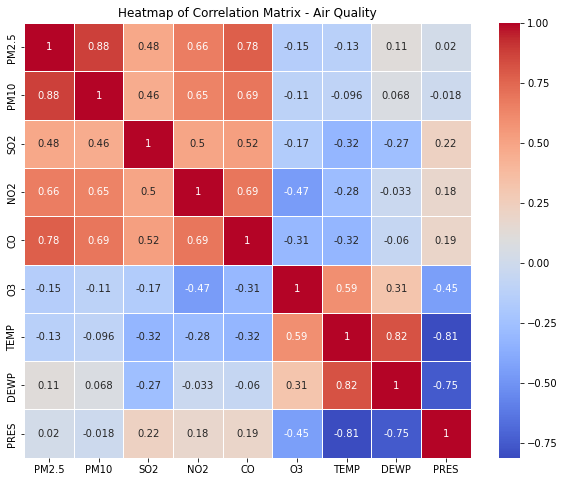

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom yang akan dianalisis untuk Air Quality dataset
columns_to_analyze = [
    'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'PRES'
]

# Menghitung matriks korelasi
correlation_matrix = air_quality_clean[columns_to_analyze].corr()
print('Matriks Korelasi:')
print(correlation_matrix)

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix - Air Quality')
plt.show()

**Insight:**
- Daerah Beijing mengalami variasi suhu yang signifikan, dari kondisi sangat dingin hingga sangat panas, yang mempengaruhi kualitas udara terutama dalam hal pembentukan ozon dan polusi.
- Variasi besar dalam kelembaban udara mengindikasikan periode dengan kelembaban yang sangat rendah (musim dingin) hingga kelembaban tinggi (musim panas), yang dapat memperburuk polusi udara pada waktu tertentu.
- Tekanan udara yang cukup stabil namun mengalami fluktuasi moderat menunjukkan bahwa kondisi atmosfer bisa berubah, yang dapat mempengaruhi akumulasi dan dispersi polutan udara.
- Visualisasi dengan heatmap untuk menunjukkan tingkat korelasi antar variabel. Warna yang lebih gelap (merah atau biru) menunjukkan korelasi yang lebih tinggi (positif atau negatif).

## Visualization & Explanatory Analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom waktu
air_quality_clean['datetime'] = pd.to_datetime(air_quality_clean[['year', 'month', 'day', 'hour']])
air_quality_clean.set_index('datetime', inplace=True)

### Pertanyaan 1:
- Bagaimana nilai temperature pada waktu jam, harian, bulanan, tahun, musim ?

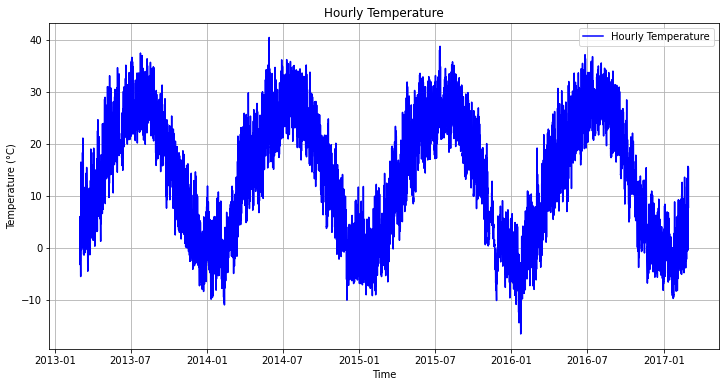

In [34]:
# Resample to hourly and calculate mean
hourly_temp = air_quality_clean['TEMP'].resample('H').mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_temp.index, hourly_temp, label='Hourly Temperature', color='blue')
plt.title('Hourly Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

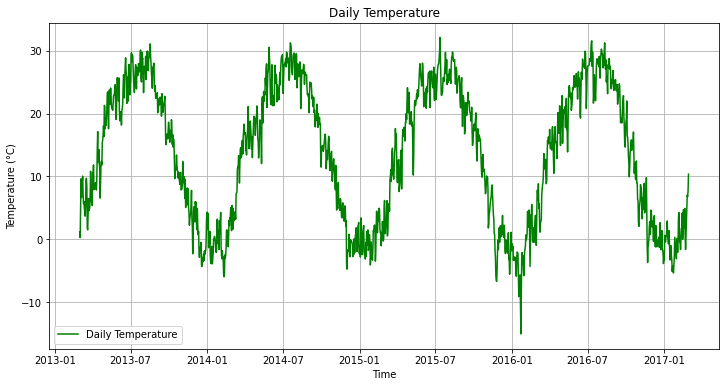

In [35]:
# Resample to daily
daily_temp = air_quality_clean['TEMP'].resample('D').mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_temp.index, daily_temp, label='Daily Temperature', color='green')
plt.title('Daily Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

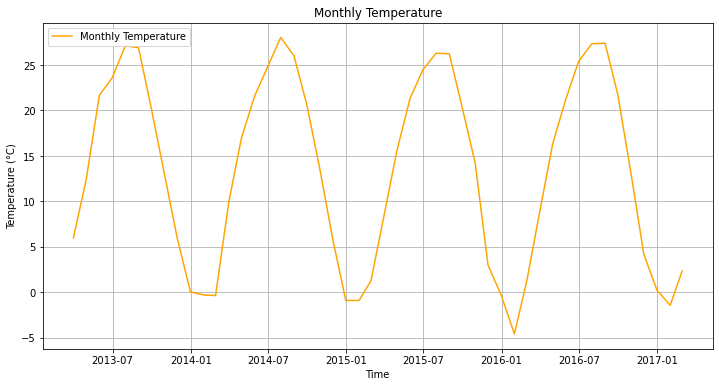

In [36]:
# Resample to monthly
monthly_temp = air_quality_clean['TEMP'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_temp.index, monthly_temp, label='Monthly Temperature', color='orange')
plt.title('Monthly Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

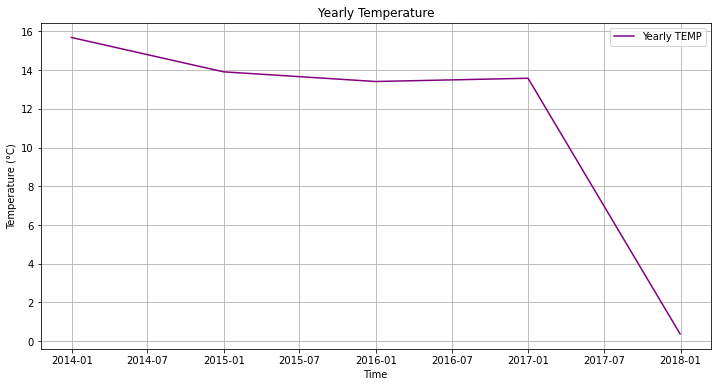

In [37]:
# Per tahun (Yearly)
yearly_dewp = air_quality_clean['TEMP'].resample('Y').mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_dewp.index, yearly_dewp, label='Yearly TEMP', color='purple')
plt.title('Yearly Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

<Figure size 864x432 with 0 Axes>

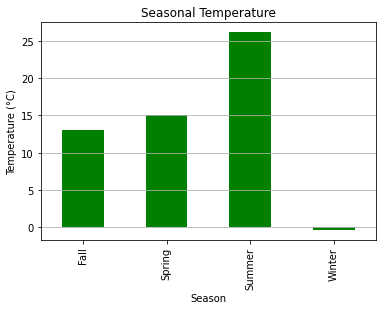

In [39]:
# Per musim (Seasonal)
seasonal_dewp = air_quality_clean.pivot_table(values='TEMP', index='Season', aggfunc='mean')

plt.figure(figsize=(12, 6))
seasonal_dewp.plot(kind='bar', color='green', legend=False)
plt.title('Seasonal Temperature')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.grid(axis='y')
plt.show()

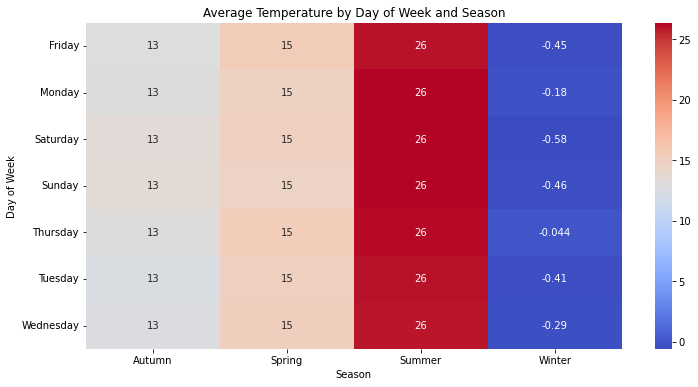

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Step 2: Add a 'season' column to the dataset
air_quality_clean['season'] = air_quality_clean['month'].apply(get_season)

# Step 3: Create data pivot for heatmap (x-axis: season, y-axis: day names)
heatmap_data_temp = air_quality_clean.pivot_table(values='TEMP', index='name day', columns='season', aggfunc='mean')
heatmap_data_dewp = air_quality_clean.pivot_table(values='DEWP', index='name day', columns='season', aggfunc='mean')
heatmap_data_pres = air_quality_clean.pivot_table(values='PRES', index='name day', columns='season', aggfunc='mean')

# Step 4: Plot the heatmap for Temperature
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_temp, annot=True, cmap='coolwarm')
plt.title('Average Temperature by Day of Week and Season')
plt.xlabel('Season')
plt.ylabel('Day of Week')
plt.show()

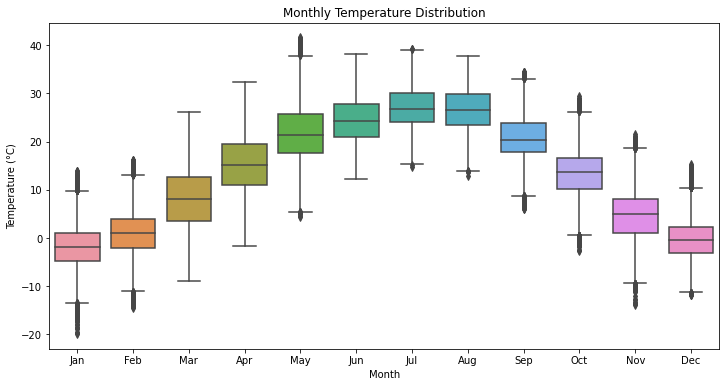

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan air_quality_clean sudah disiapkan sebelumnya dengan kolom 'datetime' sebagai index

# Step 1: Pastikan kolom month sudah ada, jika belum kita ambil dari datetime index
if 'month' not in air_quality_clean.columns:
    air_quality_clean['month'] = air_quality_clean.index.month

# Step 2: Buat box plot untuk suhu per bulan
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='TEMP', data=air_quality_clean.reset_index())
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

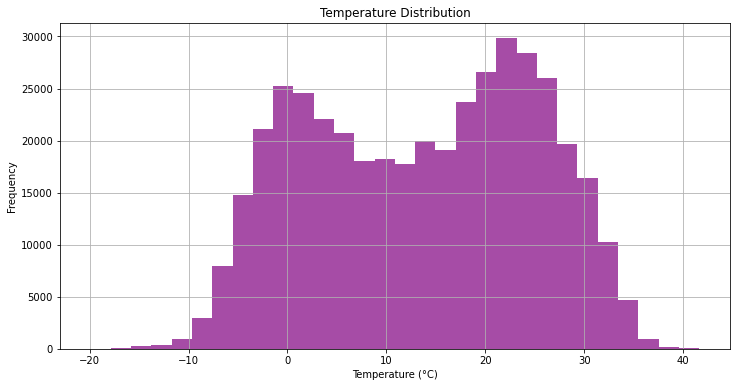

In [42]:
# Historam untuk suhu
plt.figure(figsize=(12, 6))
plt.hist(air_quality_clean['TEMP'], bins=30, alpha=0.7, color='purple')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Pertanyaan 2:
- Bagaimana nilai DEWP pada waktu jam, harian, bulanan, tahun, musim ?

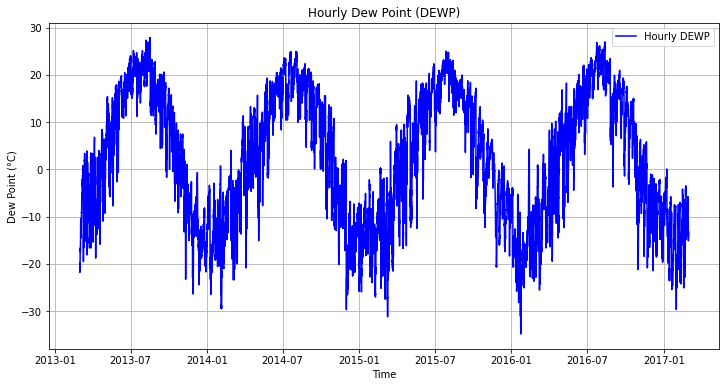

In [43]:
# Per jam (Hourly)
hourly_dewp = air_quality_clean['DEWP'].resample('H').mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_dewp.index, hourly_dewp, label='Hourly DEWP', color='blue')
plt.title('Hourly Dew Point (DEWP)')
plt.xlabel('Time')
plt.ylabel('Dew Point (°C)')
plt.legend()
plt.grid()
plt.show()

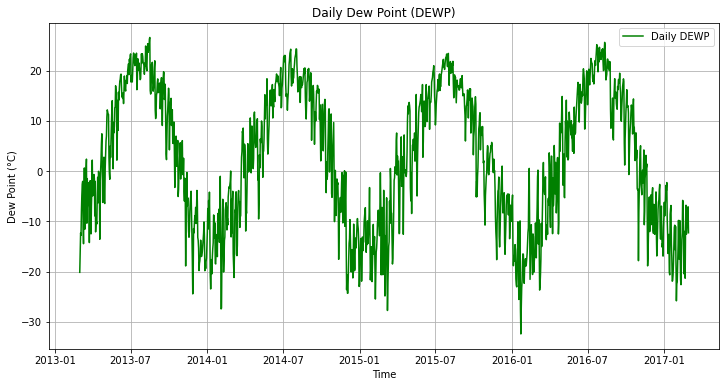

In [44]:
# Per hari (Daily)
daily_dewp = air_quality_clean['DEWP'].resample('D').mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_dewp.index, daily_dewp, label='Daily DEWP', color='green')
plt.title('Daily Dew Point (DEWP)')
plt.xlabel('Time')
plt.ylabel('Dew Point (°C)')
plt.legend()
plt.grid()
plt.show()

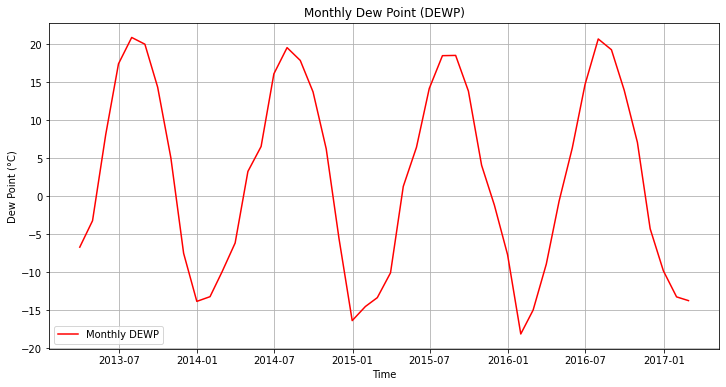

In [45]:
# Per bulan (Monthly)
monthly_dewp = air_quality_clean['DEWP'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_dewp.index, monthly_dewp, label='Monthly DEWP', color='red')
plt.title('Monthly Dew Point (DEWP)')
plt.xlabel('Time')
plt.ylabel('Dew Point (°C)')
plt.legend()
plt.grid()
plt.show()

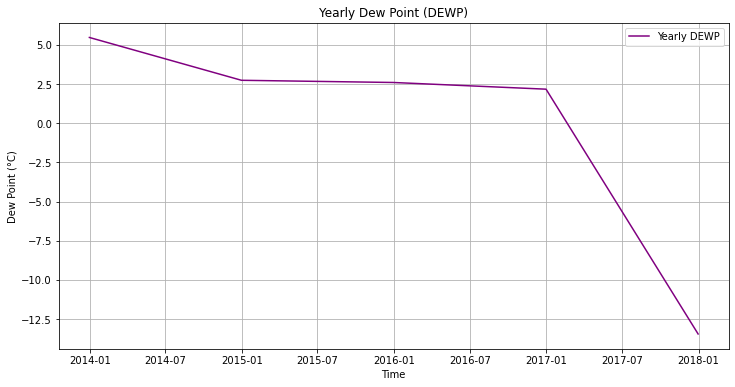

In [46]:
# Per tahun (Yearly)
yearly_dewp = air_quality_clean['DEWP'].resample('Y').mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_dewp.index, yearly_dewp, label='Yearly DEWP', color='purple')
plt.title('Yearly Dew Point (DEWP)')
plt.xlabel('Time')
plt.ylabel('Dew Point (°C)')
plt.legend()
plt.grid()
plt.show()

<Figure size 864x432 with 0 Axes>

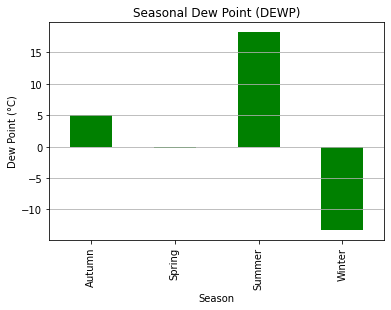

In [47]:
# Per musim (Seasonal)
seasonal_dewp = air_quality_clean.pivot_table(values='DEWP', index='season', aggfunc='mean')

plt.figure(figsize=(12, 6))
seasonal_dewp.plot(kind='bar', color='green', legend=False)
plt.title('Seasonal Dew Point (DEWP)')
plt.xlabel('Season')
plt.ylabel('Dew Point (°C)')
plt.grid(axis='y')
plt.show()

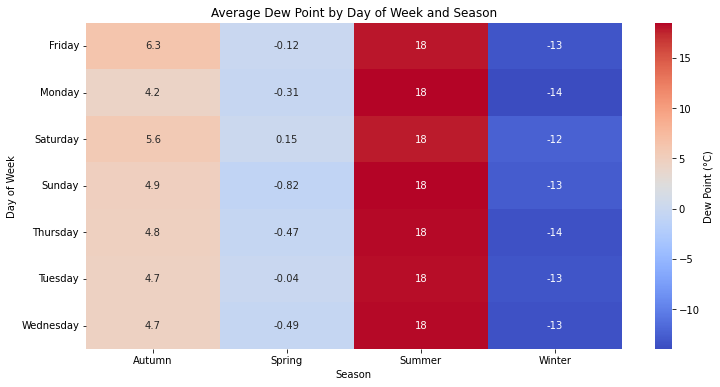

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Step 2: Add a 'season' column to the dataset
air_quality_clean['season'] = air_quality_clean['month'].apply(get_season)

# Step 3: Create data pivot for heatmap (x-axis: season, y-axis: day names)
heatmap_data_dewp = air_quality_clean.pivot_table(values='DEWP', index='name day', columns='season', aggfunc='mean')

# Step 4: Plot the heatmap for DEWP
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_dewp, annot=True, cmap='coolwarm', cbar_kws={'label': 'Dew Point (°C)'})
plt.title('Average Dew Point by Day of Week and Season')
plt.xlabel('Season')
plt.ylabel('Day of Week')
plt.show()

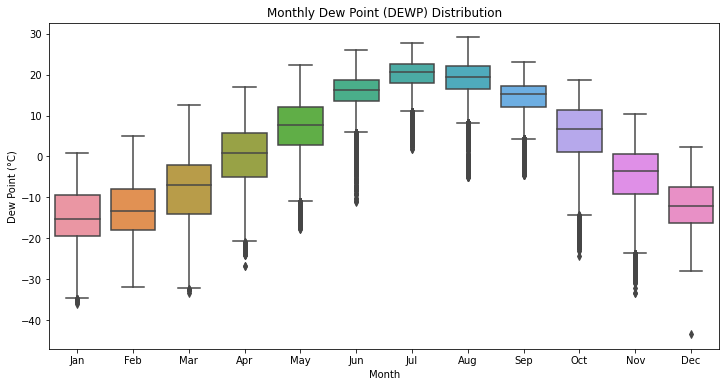

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan air_quality_clean sudah disiapkan sebelumnya dengan kolom 'datetime' sebagai index

# Step 1: Pastikan kolom month sudah ada, jika belum kita ambil dari datetime index
if 'month' not in air_quality_clean.columns:
    air_quality_clean['month'] = air_quality_clean.index.month

# Step 2: Buat box plot untuk Dew Point (DEWP) per bulan
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='DEWP', data=air_quality_clean.reset_index())
plt.title('Monthly Dew Point (DEWP) Distribution')
plt.xlabel('Month')
plt.ylabel('Dew Point (°C)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

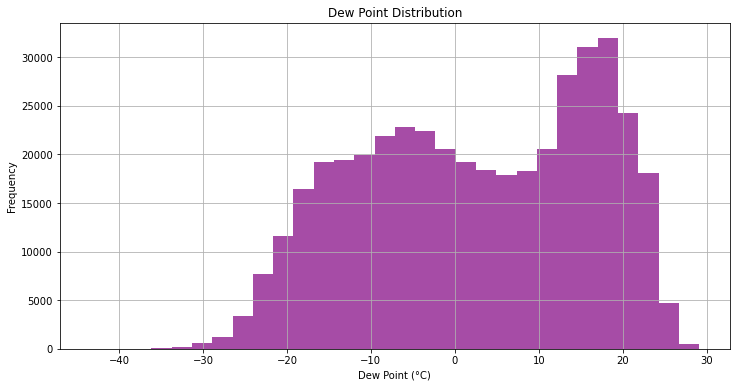

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Histogram untuk Dew Point
plt.figure(figsize=(12, 6))
plt.hist(air_quality_clean['DEWP'], bins=30, alpha=0.7, color='purple')
plt.title('Dew Point Distribution')
plt.xlabel('Dew Point (°C)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Pertanyaan 3:
- Bagaimana nilai Pressure pada waktu jam, harian, bulanan, tahun, musim ?

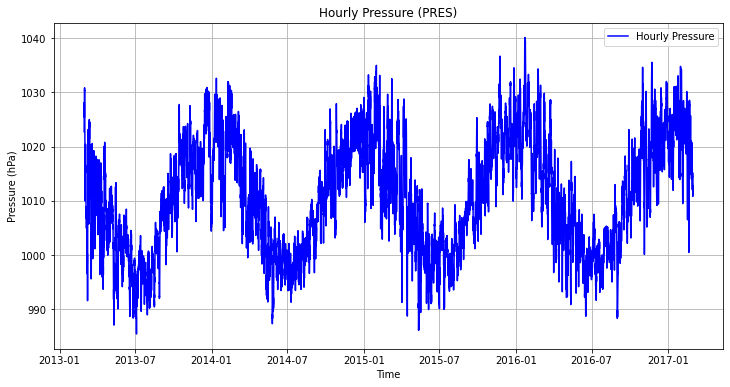

In [50]:
# Per jam (Hourly)
hourly_pres = air_quality_clean['PRES'].resample('H').mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_pres.index, hourly_pres, label='Hourly Pressure', color='blue')
plt.title('Hourly Pressure (PRES)')
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')
plt.legend()
plt.grid()
plt.show()

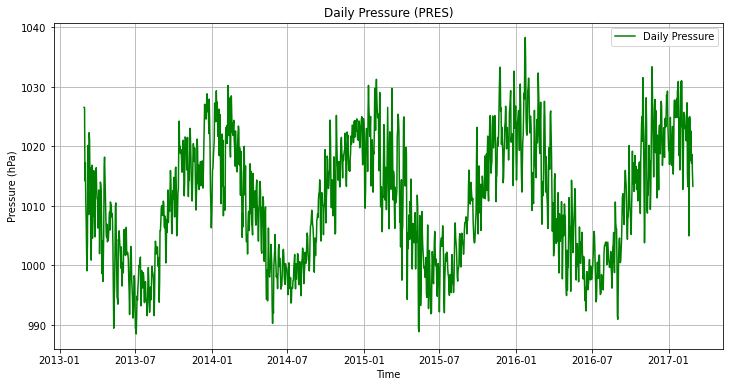

In [51]:
# Per hari (Daily)
daily_pres = air_quality_clean['PRES'].resample('D').mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_pres.index, daily_pres, label='Daily Pressure', color='green')
plt.title('Daily Pressure (PRES)')
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')
plt.legend()
plt.grid()
plt.show()

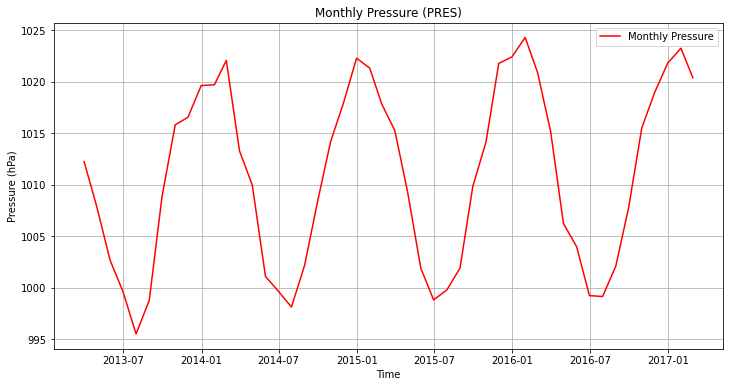

In [52]:
# Per bulan (Monthly)
monthly_pres = air_quality_clean['PRES'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_pres.index, monthly_pres, label='Monthly Pressure', color='red')
plt.title('Monthly Pressure (PRES)')
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')
plt.legend()
plt.grid()
plt.show()

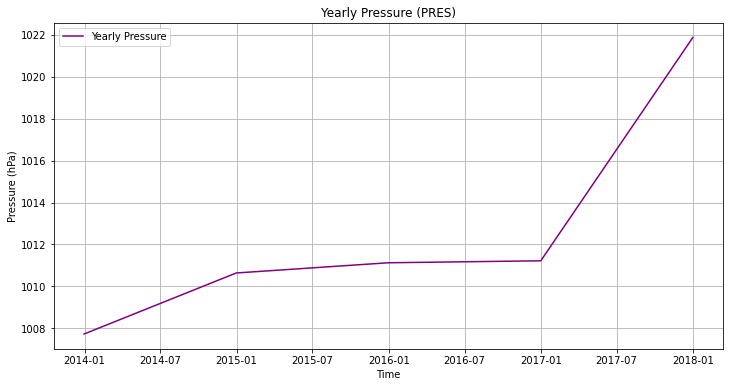

In [53]:
# Per tahun (Yearly)
yearly_pres = air_quality_clean['PRES'].resample('Y').mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_pres.index, yearly_pres, label='Yearly Pressure', color='purple')
plt.title('Yearly Pressure (PRES)')
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')
plt.legend()
plt.grid()
plt.show()

<Figure size 864x432 with 0 Axes>

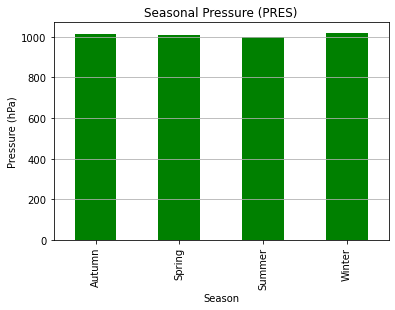

In [54]:
# Per musim (Seasonal)
seasonal_pres = air_quality_clean.pivot_table(values='PRES', index='season', aggfunc='mean')

plt.figure(figsize=(12, 6))
seasonal_pres.plot(kind='bar', color='green', legend=False)
plt.title('Seasonal Pressure (PRES)')
plt.xlabel('Season')
plt.ylabel('Pressure (hPa)')
plt.grid(axis='y')
plt.show()

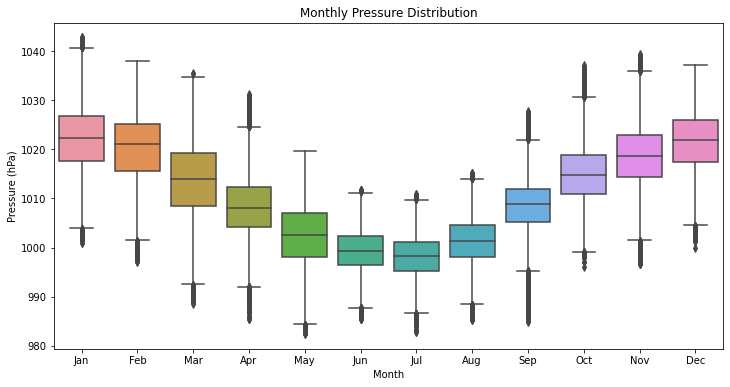

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan air_quality_clean sudah disiapkan sebelumnya dengan kolom 'datetime' sebagai index

# Step 1: Pastikan kolom month sudah ada, jika belum kita ambil dari datetime index
if 'month' not in air_quality_clean.columns:
    air_quality_clean['month'] = air_quality_clean.index.month

# Step 2: Buat box plot untuk Pressure per bulan
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='PRES', data=air_quality_clean.reset_index())
plt.title('Monthly Pressure Distribution')
plt.xlabel('Month')
plt.ylabel('Pressure (hPa)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

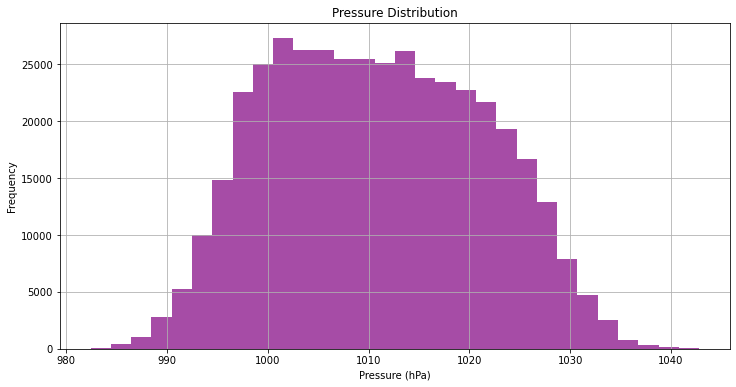

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Histogram untuk Pressure
plt.figure(figsize=(12, 6))
plt.hist(air_quality_clean['PRES'], bins=30, alpha=0.7, color='purple')
plt.title('Pressure Distribution')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Insight:**
- Tren Musiman dan Harian: Terdapat pola yang jelas dalam variasi suhu, dew point, dan tekanan berdasarkan musim dan waktu dalam sehari. Suhu cenderung lebih tinggi di musim panas dan lebih rendah di musim dingin, sementara variasi harian menunjukkan perubahan signifikan antara pagi dan siang.
- Korelasi Antar Variabel: Terdapat hubungan positif antara dew point dan suhu, di mana peningkatan dew point seringkali berkaitan dengan suhu yang lebih tinggi. Selain itu, variasi tekanan atmosfer mungkin mempengaruhi kualitas udara, dengan potensi peningkatan polutan pada saat tekanan rendah.
- Implikasi Kebijakan dan Perencanaan: Insight dari analisis ini dapat digunakan untuk menginformasikan kebijakan lingkungan dan perencanaan kesehatan masyarakat. Pemahaman tentang pola kualitas udara dapat membantu dalam pengembangan strategi untuk mengurangi emisi dan melindungi populasi rentan selama periode tertentu.

## Conclusion

- Variasi Temporal Suhu: Nilai suhu menunjukkan fluktuasi yang signifikan sepanjang hari, dengan puncak tertinggi umumnya terjadi pada siang hari dan terendah pada malam hari. Secara bulanan dan tahunan, suhu cenderung lebih tinggi pada musim panas dan lebih rendah pada musim dingin, mencerminkan pola musiman yang konsisten.
- Perilaku Dew Point: Dew point juga menunjukkan pola yang sejalan dengan suhu, tetapi dengan sedikit variasi yang lebih stabil. Secara jam, DEWP cenderung lebih konsisten, dengan peningkatan selama musim yang lebih lembap. Secara bulanan, DEWP menunjukkan tren peningkatan seiring dengan meningkatnya suhu selama bulan-bulan hangat.
- Fluktuasi Tekanan Atmosfer: Tekanan atmosfer menunjukkan variasi yang lebih kompleks. Secara harian, tekanan bisa mengalami fluktuasi signifikan, dengan kecenderungan untuk lebih rendah pada hari-hari hujan. Secara bulanan dan tahunan, pola tekanan menunjukkan kestabilan pada waktu-waktu tertentu, namun dapat terpengaruh oleh fenomena cuaca ekstrem.